In [22]:
import tensorflow as tf 
import sklearn as sci 
import numpy as np 

from sklearn.model_selection import StratifiedShuffleSplit

import os 
import sys 
sys.path.insert(0, './../code/src')
from utils.plotting import plot_labels_histogram


In [35]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load and display the image
             "C:\\Users\\NiXoN\\Desktop\\_thesis\\mad_gan_thesis\\code\\experiments\\2025-02-12_MADGAN_MNIST_5_GEN_DataCreation_SPEC_GEN_0\\gen_0_89999__0.png"
image_path = "C:\\Users\\NiXoN\\Desktop\\_thesis\\mad_gan_thesis\\code\\experiments\\2025-02-12_MADGAN_MNIST_5_GEN_DataCreation_SPEC_GEN_0\\generated_images\gen_0_89999__0.png"

# Open the image using PIL
img = Image.open(image_path)

# Optionally, convert the image to a NumPy array if needed
img_array = np.array(img)

# Display the image
plt.imshow(img_array, cmap='gray' if img_array.ndim == 2 else None)
plt.axis('off')  # Hide axes
plt.show()


IndentationError: unexpected indent (2116789207.py, line 6)

In [28]:
type(tf.keras.datasets.mnist.load_data)

function

In [24]:
def get_stratified_indexes(n_images_by_class, labels, seed=42):
    """
    Create a list of indexes for stratified sub-selection of samples from a dataset.

    Parameters:
        n_images_by_class (dict): A dictionary mapping class label to the number of samples to select,
                                  e.g., {i: 5000 for i in range(10)}.
        labels (np.ndarray): A 1D numpy array of class labels corresponding to each sample in the dataset.
        seed (int): Random seed for reproducibility.

    Returns:
        List[int]: A list of indexes that can be used to subselect samples from the data.
    """
    # Set seed for reproducibility
    rng = np.random.default_rng(seed)
    selected_indexes = []
    
    for label, count in n_images_by_class.items():
        # Find all indexes for the current class
        label_indexes = np.where(labels == label)[0]
        
        # Check that there are enough samples
        if len(label_indexes) < count:
            raise ValueError(f"Not enough samples for class {label}: requested {count}, available {len(label_indexes)}")
        
        shuffled = rng.permutation(label_indexes)
        selected_indexes.append(shuffled[:count])
    
    selected_indexes = np.concatenate(selected_indexes)
    final_indexes = rng.permutation(selected_indexes)
    
    return final_indexes.tolist()

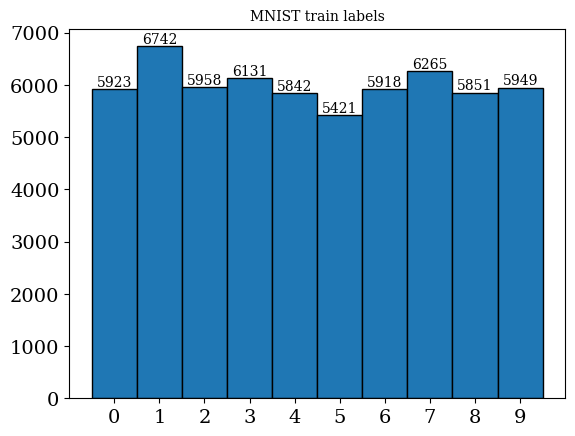

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

plot_labels_histogram(train_y, title="MNIST train labels")

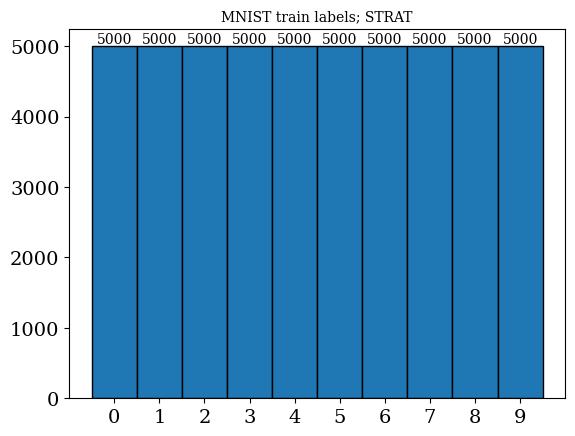

In [26]:
rdx = get_stratified_indexes(n_images_by_class={i: 5000 for i in range(10)}, labels=train_y)
ss = train_y[rdx]
plot_labels_histogram(ss, title="MNIST train labels; STRAT")